In [1]:
!pip3 install --upgrade pandas_datareader

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statistics
import datetime as dt
from pandas_datareader.data import DataReader

In [4]:
base_path = '/content/drive/MyDrive/dwave/'

In [5]:
def gen_daily_results(path):
    update_values = pd.read_pickle(path+'opt_results_df.pkl')
    initial_budget = update_values.loc[1, 'Value']
    initial_variance = update_values.iloc[0,-2]
    update_values['Value2'] = update_values['Value'] / initial_budget - 1
    update_values['Variance2'] = update_values['Variance'] / initial_variance - 1
    return update_values

In [6]:
def gen_baseline(path):
    update_values = pd.read_pickle(path+'df_baseline.pkl')
    return update_values

In [7]:
path = 'Run85/'
df85 = gen_daily_results(base_path+path)
df85_baseline = gen_baseline(base_path+path)

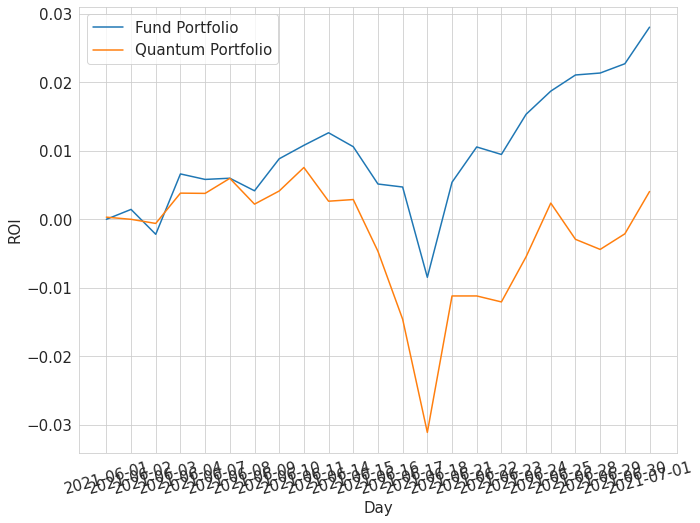

In [8]:
sns.set_style('whitegrid')
fig = plt.figure(figsize=(10.708,8.2))
plt.rc('font', size=15)
sns.lineplot(x='Date', y='^GSPC', data=df85_baseline, label='Fund Portfolio')
sns.lineplot(x='Date', y='Value2', data=df85, label='Quantum Portfolio')
plt.xticks(rotation=15)
plt.xlabel('Day')
plt.ylabel('ROI')
plt.legend()
plt.show()

In [30]:
payload=pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
first_table = payload[0]
stocks = first_table['Symbol'].values.tolist()
dates = ["2021-06-01", "2021-07-01"]
# window_size = 20
# list_all_dates = []
# n_days = 0
# offset = 0
# while n_days < window_size:
#     g = (dt.datetime.strptime(dates[0], '%Y-%m-%d') - dt.timedelta(days=x) for x in range(offset))
#     list_all_dates = [x for x in g if x.weekday() not in (5, 6)]
#     n_days = len(list_all_dates)
#     offset += 1
# initial_date = list_all_dates[-1]

# list_dates = [x for x in pd.date_range(dates[0], dates[1], freq='1d').to_pydatetime() if x.weekday() not in (5,6)]
# print(f'initial date: {initial_date}')
#panel_data = DataReader(stocks, 'yahoo', initial_date, list_dates[-1])
panel_data = DataReader(stocks, 'yahoo', dates[0], dates[1])
df_all = pd.DataFrame(index=panel_data.index, columns=stocks)

for i in stocks:
    df_all[i] = panel_data[[('Adj Close',  i)]]
df_all.dropna(axis=1, inplace=True)
updated_stocks = df_all.columns.values.tolist()

/usr/local/lib/python3.7/dist-packages/pandas_datareader/base.py:272: SymbolWarning: Failed to read symbol: 'BRK.B', replacing with NaN.
  warnings.warn(msg.format(sym), SymbolWarning)
/usr/local/lib/python3.7/dist-packages/pandas_datareader/base.py:272: SymbolWarning: Failed to read symbol: 'BF.B', replacing with NaN.
  warnings.warn(msg.format(sym), SymbolWarning)
/usr/local/lib/python3.7/dist-packages/pandas_datareader/base.py:272: SymbolWarning: Failed to read symbol: 'CEG', replacing with NaN.
  warnings.warn(msg.format(sym), SymbolWarning)


In [18]:
df85.head()

,Date,Value,MMM,AOS,ABT,ABBV,ABMD,ACN,ATVI,ADM,...,XYL,YUM,ZBRA,ZBH,ZION,ZTS,Variance,Returns,Value2,Variance2
0,2021-06-01,99997.945745,1,2,6,4,2,0,0,1,...,0,0,0,2,21,7,A 8035.85 AAL 8035.85 AAP 8035.8...,A 14384553.89 AAL 14384553.89 AAP ...,0.000315,A NaN AAL NaN AAP NaN AAPL NaN AB...
1,2021-06-02,99966.500291,2,18,0,0,2,0,3,3,...,6,2,0,0,3,0,A 103492.91 AAL 103492.91 AAP 10...,A 13412493.32 AAL 13412493.32 AAP ...,0.000000,A NaN AAL NaN AAP NaN AAPL NaN AB...
2,2021-06-03,99906.272316,3,4,0,3,3,2,1,6,...,3,0,0,1,4,0,A 95707.03 AAL 95707.03 AAP 9570...,A 13707477.51 AAL 13707477.51 AAP ...,-0.000602,A NaN AAL NaN AAP NaN AAPL NaN AB...
3,2021-06-04,100348.793418,0,2,3,0,0,1,7,7,...,2,0,1,7,1,1,A 63119.52 AAL 63119.52 AAP 6311...,A 15139309.77 AAL 15139309.77 AAP ...,0.003824,A NaN AAL NaN AAP NaN AAPL NaN AB...
4,2021-06-07,100345.094592,2,5,0,8,1,0,2,0,...,1,1,0,2,2,0,A 130647.57 AAL 130647.57 AAP 13...,A 15572366.2 AAL 15572366.2 AAP ...,0.003787,A NaN AAL NaN AAP NaN AAPL NaN AB...


In [26]:
baseline=['^GSPC']
index_df = DataReader(baseline, 'yahoo', dates[0], dates[1])
df_baseline = pd.DataFrame(index=index_df.index, columns=baseline)
for i in baseline:
    df_baseline[i] = index_df[[('Adj Close',  i)]]
df_baseline = df_baseline / df_baseline.loc[dates[0], '^GSPC'] - 1
df_baseline.head()

,^GSPC
Date,
2021-06-01,0.000000
2021-06-02,0.001447
2021-06-03,-0.002187
2021-06-04,0.006628
2021-06-07,0.005826


In [22]:
weights = df85.loc[0, updated_stocks].to_list()
len(weights)

499

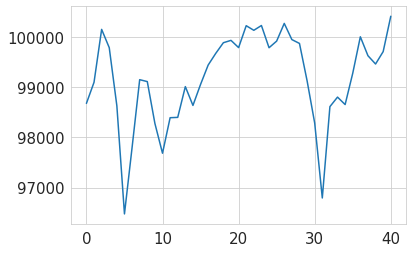

In [25]:
returns = []
for idx in df_all.index:
    prices = df_all.loc[idx, updated_stocks].to_list()
    returns_per_day = []
    for j,k in zip(weights, prices):
        returns_per_day.append(j * k)
    returns.append(sum(returns_per_day))

plt.plot(returns)

In [28]:
df_baseline.shape

(23, 1)

In [29]:
df_all.head()

,MMM,AOS,ABT,ABBV,ABMD,ACN,ATVI,ADM,ADBE,ADP,...,WTW,GWW,WYNN,XEL,XYL,YUM,ZBRA,ZBH,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2021-05-05,191.055618,69.745743,116.211304,109.997528,300.790009,285.239166,89.547722,64.147285,486.690002,188.365768,...,263.179993,454.139191,127.809998,70.284035,116.196274,117.945854,482.420013,167.639114,57.881859,173.155075
2021-05-06,191.975616,69.863258,116.485863,110.282532,295.720001,286.854919,92.480286,64.622108,483.609985,189.980392,...,266.510010,452.600922,122.779999,71.078766,117.572487,118.140663,471.410004,167.329987,58.836285,166.840790
2021-05-07,192.601639,69.657608,116.642769,109.969009,296.809998,287.219452,94.239830,64.941872,488.730011,189.562149,...,270.070007,460.774628,126.290001,70.850273,118.156639,118.082230,488.579987,166.615204,58.925762,170.854446
2021-05-10,196.641998,70.754433,116.632965,110.415558,282.720001,286.313019,92.619461,65.532944,479.380005,189.085526,...,268.880005,469.264954,125.730003,72.111908,118.612083,118.754303,484.040009,166.093597,58.577789,170.475983
2021-05-11,193.218094,69.403000,116.093643,109.151970,280.299988,283.692413,94.776634,64.815903,485.190002,189.153625,...,264.250000,457.865356,125.000000,70.562187,116.463593,116.056229,485.670013,161.843460,58.200001,169.539795
